Using TensorFlow backend.


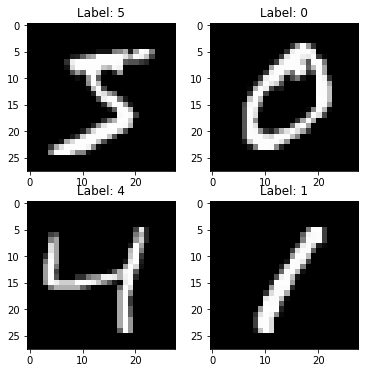

In [1]:
%matplotlib inline

import keras
import matplotlib.pyplot as plt
import numpy as np
import hw1_script as hw1

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)
## Let's look at some example
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [2]:
network = []
network.append(hw1.Dense(X_train.shape[1],100))
network.append(hw1.ReLU())
network.append(hw1.Dense(100,10))

def forward(network, X):
    # Compute activations of all network layers by applying them sequentially.
    # Return a list of activations for each layer. 
    
    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # Updating input to last layer output
        input = activations[-1]
    
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    # Compute network predictions. Returning indices of largest Logit probability
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y,t):
    # Train our network on a given batch of X and y.
    # We first need to run forward to get all layer activations.
    # Then we can run layer.backward going from last to first layer.
    # After we have called backward for all layers, all Dense layers have already made one gradient step.
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    #if t % 1000 == 0:
        
        #print(np.round(logits, 2))
    
    # Compute the loss and the initial gradient
    loss = hw1.softmax_crossentropy_with_logits(logits,y)
    loss_grad = hw1.grad_softmax_crossentropy_with_logits(logits,y)
    
    # Propagate gradients through the network
    # Reverse propogation as this is backprop
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward_adam(layer_inputs[layer_index],loss_grad,t) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)

In [3]:
from tqdm import trange

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [4]:
#from IPython.display import clear_output

train_log = []
val_log = []

t = 0

for epoch in range(25):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        
        t += 1
        
        train(network,x_batch,y_batch,t)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    #clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    #plt.plot(train_log,label='train accuracy')
    #plt.plot(val_log,label='val accuracy')
    #plt.legend(loc='best')
    #plt.grid()
    #plt.show()
    
test_accuracy = np.mean(predict(network,X_test)==y_test)
print(test_accuracy)

100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:01<00:00, 912.72it/s]


Epoch 0
Train accuracy: 0.95598
Val accuracy: 0.9554


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:01<00:00, 904.75it/s]


Epoch 1
Train accuracy: 0.95758
Val accuracy: 0.9544


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:01<00:00, 885.57it/s]


Epoch 2
Train accuracy: 0.96518
Val accuracy: 0.9573


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:01<00:00, 970.94it/s]


Epoch 3
Train accuracy: 0.97076
Val accuracy: 0.9571


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:02<00:00, 573.88it/s]


Epoch 4
Train accuracy: 0.97162
Val accuracy: 0.9556


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 462.94it/s]


Epoch 5
Train accuracy: 0.9735
Val accuracy: 0.9617


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 450.36it/s]


Epoch 6
Train accuracy: 0.97144
Val accuracy: 0.9608


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 427.11it/s]


Epoch 7
Train accuracy: 0.9678
Val accuracy: 0.9527


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 421.06it/s]


Epoch 8
Train accuracy: 0.97602
Val accuracy: 0.9619


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 409.55it/s]


Epoch 9
Train accuracy: 0.97994
Val accuracy: 0.9641


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 409.45it/s]


Epoch 10
Train accuracy: 0.98002
Val accuracy: 0.9648


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 405.47it/s]


Epoch 11
Train accuracy: 0.98
Val accuracy: 0.9625


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 400.49it/s]


Epoch 12
Train accuracy: 0.985
Val accuracy: 0.9639


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 408.17it/s]


Epoch 13
Train accuracy: 0.98512
Val accuracy: 0.963


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 402.60it/s]


Epoch 14
Train accuracy: 0.98612
Val accuracy: 0.9653


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 404.48it/s]


Epoch 15
Train accuracy: 0.9871
Val accuracy: 0.967


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 403.75it/s]


Epoch 16
Train accuracy: 0.98404
Val accuracy: 0.966


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 397.65it/s]


Epoch 17
Train accuracy: 0.98168
Val accuracy: 0.9612


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 401.01it/s]


Epoch 18
Train accuracy: 0.9813
Val accuracy: 0.9596


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 394.94it/s]


Epoch 19
Train accuracy: 0.9853
Val accuracy: 0.9669


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 397.95it/s]


Epoch 20
Train accuracy: 0.9844
Val accuracy: 0.9623


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 399.17it/s]


Epoch 21
Train accuracy: 0.98476
Val accuracy: 0.965


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 396.89it/s]


Epoch 22
Train accuracy: 0.98612
Val accuracy: 0.9661


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 402.35it/s]


Epoch 23
Train accuracy: 0.98328
Val accuracy: 0.9632


100%|█████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:03<00:00, 401.00it/s]


Epoch 24
Train accuracy: 0.98768
Val accuracy: 0.9659
0.9634
